# Programación en entornos BigData. Primera entrega.
* En todos los gráficos se valorará que se pueda entender fácilmente la información mostrada. Incluye la utilización de etiquetas, leyendas, títulos, escalas apropiadas...
* También se valorará la calidad del código, incluyendo comentarios, y del resto del notebook.
* La entrega se realiza a través del aula virtual, completando este notebook en Jupyter. Hay que guardarlo con el nombre Entrega1_[nombre]_[apellidos].ipynb
* No hay que incluir los ficheros de datos en la entrega.
* El ejercicio 1 hay que hacerlo con los datos del fichero “insurance.csv”.
* El ejercicio 2 hay que hacerlo con los datos de los ficheros "ActuacionesBomberos_2023.csv" y "ActuacionesBomberos_2024.csv". La estructura de datos es diferente entre los dos ficheros. Más información:
  https://datos.madrid.es/sites/v/index.jsp?vgnextoid=fa677996afc6f510VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD  
* Todos los ejercicios hay que resolverlos utilizando solo Matplotlib.
* Por favor, no edites los enunciados.
* Calificación:
**    Ejercicio 1: 1 punto por cada apartado.
**    Ejercicio 2:

>>> apartados a, c y d: 1 punto cada uno

>>> apartados b y e: 0.5 puntos cada uno.




In [227]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Carga de datos

In [228]:
## no edites ni elimines esta celda !!!
# path = "../datos/"
# seguros = pd.read_csv(path + "/insurance.csv", sep = ",")
# bomberos23 =  pd.read_csv(path + "/ActuacionesBomberos_2023.csv", sep = ";")
# bomberos24 =  pd.read_csv(path + "/ActuacionesBomberos_2024.csv", sep = ";")
# print(seguros.head())
# print(bomberos23.head())
# print(bomberos24.head())

Hay que cargar los datos de seguros (insurance.csv) y de bomberos (ActuacionesBomberos_2023.csv y ActuacionesBomberos_2024.csv) en dataframes llamados seguros, bomberos23 y bomberos 24.
Edita la siguiente celda para que se ajuste a tus rutas.

In [229]:
# google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [230]:
path = "/content/drive/My Drive/Clara del Rey/BIG DATA/Programacion/FTP/000 Datos/"
seguros = pd.read_csv(path + "insurance.csv", sep = ",")
bomberos23 = pd.read_csv(path + "ActuacionesBomberos_2023.csv", sep = ";")
bomberos24 = pd.read_csv(path + "ActuacionesBomberos_2024.csv", sep = ";")

In [231]:
seguros.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [232]:
bomberos23.head(2)

,AÑO,MES,DISTRITO,FUEGOS,DAÑOS EN CONSTRUCCION,SALVAMENTOS Y RESCATES,DAÑOS POR AGUA,INCIDENTES DIVERSOS,SALIDAS SIN INTERVENCION,SERVICIOS VARIOS,TOTAL
0,2023,diciembre,CENTRO,40,21,71,26,60,11,10,239
1,2023,diciembre,ARGANZUELA,13,7,34,13,16,2,2,87


In [233]:
bomberos24.head(2)

,AÑO,MES,DISTRITO,CODIGO DISTRITO,FUEGOS,DAÑOS EN CONSTRUCCION,SALVAMENTOS Y RESCATES,DAÑOS POR AGUA,INCIDENTES DIVERSOS,SALIDAS SIN INTERVENCION,SERVICIOS VARIOS
0,2024,septiembre,CENTRO,1,44,37,76,26,72,12,3
1,2024,septiembre,ARGANZUELA,2,21,4,30,13,36,3,3


## Ejercicio 1
 En este ejercicio utilzamos los datos de seguros.

 ### a) Muestra un gráfico con un diagrama de barras con el número de asegurados que hay en cada región. La región estará en el eje x. (1 punto)


Introduce tu solución a partir de aquí ...

In [234]:
# Comprobamos que no hay nulos en nuestro DF
seguros.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [235]:
# Valores unicos de las regiones
seguros.region.value_counts()
seguros.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [236]:
# Agrupar y contar asegurados por region
region = seguros.groupby('region')['region'].count()
region

,region
region,
northeast,324
northwest,325
southeast,364
southwest,325


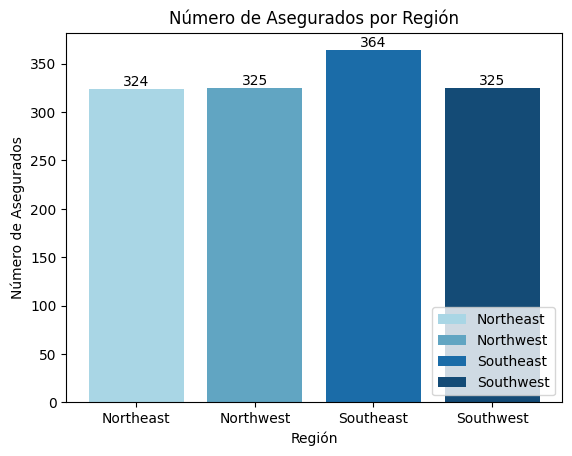

In [237]:
# Grafico de barras: Nº de asegurados en f(region)
fig, ax = plt.subplots()
color_palet = ["#A9D6E5", "#61A5C2", "#1B6CA8", "#144B76"]

capitalized_regions = list(map(str.capitalize, region.index))
capitalized_regions = [x.capitalize() for x in region.index]

b = ax.bar(x = region.index, height = region.values, tick_label = capitalized_regions, label = capitalized_regions, color = color_palet)
ax.bar_label(b)

ax.set_xlabel('Región')
ax.set_ylabel('Número de Asegurados')
ax.set_title('Número de Asegurados por Región')
ax.legend(loc = "lower right")

plt.show()

### b) Muestra un gráfico con cuatro subplots, uno por cada región. En cada uno se mostrará un grafico de tarta con el porcentaje fumadores y no fumadores en esa región. (1 punto)

Introduce tu solución a partir de aquí ...

In [238]:
# Agrupamos por region y si es fumador o no
region = seguros.groupby(['region', 'smoker'])['smoker'].count()
region

region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
Name: smoker, dtype: int64

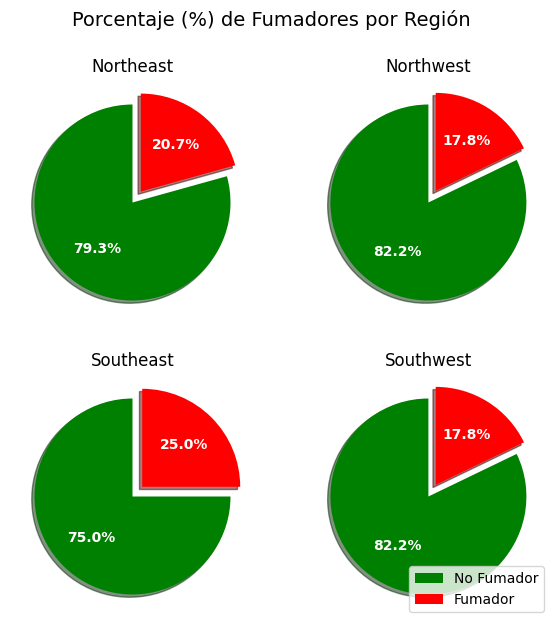

In [239]:
# Cuatro subplots: 1 por cada region para fumadores y no fumadores
fig, ax = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(w = 7, h = 7)

resalte = [0.0, 0.14]
label_fumador = ['No Fumador', 'Fumador']
label_text = {'color': 'white', 'weight': 'bold'}
color_palet = ['green', 'red']


ax[0, 0].pie(x = region['northeast'], explode = resalte, autopct = '%1.1f%%', shadow = True, startangle = 90, colors = color_palet, textprops = label_text)
ax[0, 0].set_title("Northeast",  loc="center")

ax[0, 1].pie(x = region['northwest'], explode = resalte, autopct = '%1.1f%%', shadow = True, startangle = 90, colors = color_palet, textprops = label_text)
ax[0, 1].set_title("Northwest",  loc="center")

ax[1, 0].pie(x = region['southeast'], explode = resalte, autopct = '%1.1f%%', shadow = True, startangle = 90, colors = color_palet, textprops = label_text)
ax[1, 0].set_title("Southeast",  loc="center")

ax[1, 1].pie(x = region['southwest'], explode = resalte, autopct = '%1.1f%%', shadow = True, startangle = 90, colors = color_palet, textprops = label_text)
ax[1, 1].set_title("Southwest",  loc="center")


fig.suptitle('Porcentaje (%) de Fumadores por Región', fontsize = 14)

ax[1, 1].legend(label_fumador, loc = "lower right")

plt.show()

### c) Muestra un gráfico con cuatro subplots, uno por cada región. En cada uno se mostrará un histograma con el precio del seguro en esa región. (1 punto)



Introduce tu solución a partir de aquí ...

In [240]:
# Agrupamos por region y seleccionamos la columna charges
northeast_charges = seguros[seguros['region'] == 'northeast']['charges']
northwest_charges = seguros[seguros['region'] == 'northwest']['charges']
southeast_charges = seguros[seguros['region'] == 'southeast']['charges']
southwest_charges = seguros[seguros['region'] == 'southwest']['charges']

northeast_charges.head(2)

,charges
8,6406.4107
10,2721.3208


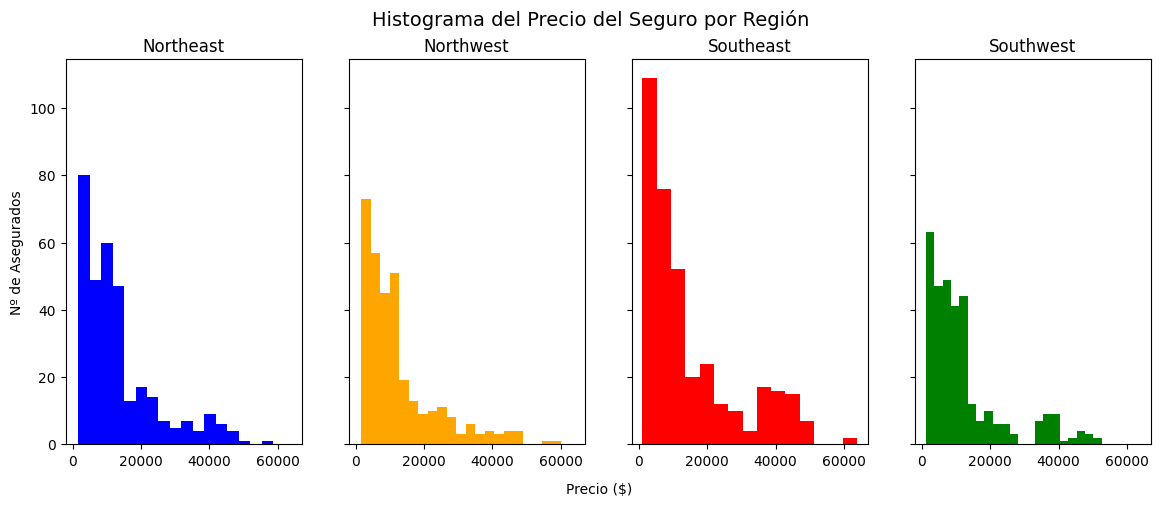

In [241]:
# Cuatro subplots: 1 por cada region con el histograma del precio
fig, ax = plt.subplots(nrows = 1, ncols = 4, sharex = True, sharey = True)
fig.set_size_inches(w = 14, h = 5)


ax[0].hist(x = northeast_charges, bins = 'auto', histtype = 'stepfilled', color = 'blue')
ax[0].set_title("Northeast",  loc="center")

ax[1].hist(x = northwest_charges, bins = 'auto', histtype = 'bar', color = 'orange')
ax[1].set_title("Northwest",  loc="center")

ax[2].hist(x = southeast_charges, bins = 'auto', histtype = 'bar', color = 'red')
ax[2].set_title("Southeast",  loc="center")

ax[3].hist(x = southwest_charges, bins = 'auto', histtype = 'bar', color = 'green')
ax[3].set_title("Southwest",  loc="center")

fig.suptitle('Histograma del Precio del Seguro por Región', fontsize = 14)


ax[0].set_ylabel('Nº de Asegurados')
ax[1].set_xlabel('Precio ($)', labelpad=10, x = 1.06)

plt.show()

### d) Muestra un gráfico de violín con el precio del seguro en cada región. (1 punto)


Introduce tu solución a partir de aquí ...

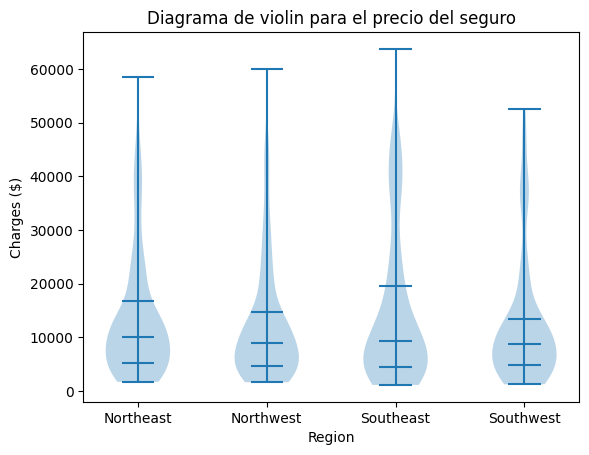

In [242]:
fig, ax = plt.subplots()

# para mostrar los cuantiles se pasa una lista de listas. Para cada serie, una lista con los cuantiles que se quieren mostrar
ax.violinplot((northeast_charges,
               northwest_charges,
               southeast_charges,
               southwest_charges),
               showmedians = True,
               quantiles = [[0.25, 0.75], [0.25, 0.75], [0.25, 0.75], [0.25, 0.75]])

ax.set_title("Diagrama de violin para el precio del seguro")
ax.set_xlabel("Region")
ax.set_ylabel("Charges ($)")

ax.set_xticks([1, 2, 3, 4], labels=["Northeast","Northwest", "Southeast", "Southwest"])

plt.show()

### e) Muestra un gráfico de cajas con el precio del seguro en cada región. (1 punto)


Introduce tu solución a partir de aquí ...

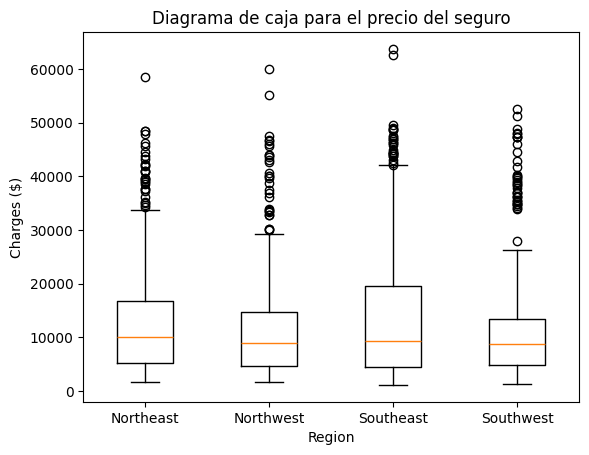

In [243]:
fig, ax = plt.subplots()

# para mostrar los cuantiles se pasa una lista de listas. Para cada serie, una lista con los cuantiles que se quieren mostrar
ax.boxplot((northeast_charges,
            northwest_charges,
            southeast_charges,
            southwest_charges),
            labels=["Northeast","Northwest", "Southeast", "Southwest"])

ax.set_title("Diagrama de caja para el precio del seguro")
ax.set_xlabel("Region")
ax.set_ylabel("Charges ($)")

plt.show()

### f) Escribe una versión del apartado c) en la que los cuatro histogramas se muestren en un sólo gŕafico 3D. (1 punto)
Ejemplos:

https://matplotlib.org/stable/gallery/mplot3d/bars3d.html

https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html

https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html#polygon-plots

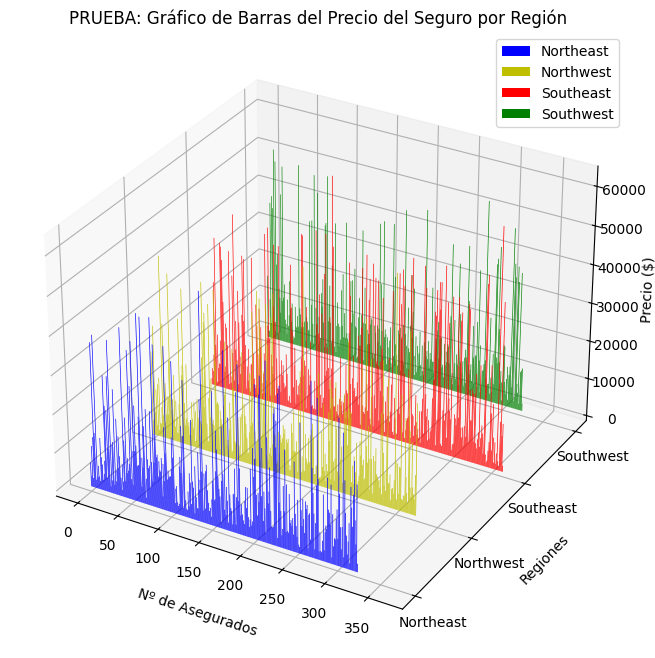

In [244]:
# Prueba con ax.bar

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_size_inches(w = 17, h = 8)

# Colores, etiquetas, ancho de barras
colors = ['b', 'y', 'r', 'g']
yticks = [0, 1, 2, 3]


# Para la región noreste
xs = np.arange(len(northeast_charges))
ys = northeast_charges.values
ax.bar(xs, ys, zs=0, zdir='y', color='b', label='Northeast')

# Para la región noroeste
xs = np.arange(len(northwest_charges))
ys = northwest_charges.values
ax.bar(xs, ys, zs=1, zdir='y', color='y', label='Northwest')

# Para la región sureste
xs = np.arange(len(southeast_charges))
ys = southeast_charges.values
ax.bar(xs, ys, zs=2, zdir='y', color='r', label='Southeast')

# Para la región suroeste
xs = np.arange(len(southwest_charges))
ys = southwest_charges.values
ax.bar(xs, ys, zs=3, zdir='y', color='g', label='Southwest')


# Etiquetas de los ejes
ax.set_xlabel('Nº de Asegurados', labelpad=10)
ax.set_ylabel('Regiones', labelpad=10)
ax.set_zlabel('Precio ($)')

# Configuramos las etiquetas en el eje Y
ax.set_yticks(yticks)
ax.set_yticklabels(['Northeast', 'Northwest', 'Southeast', 'Southwest'])

plt.legend()
plt.title('PRUEBA: Gráfico de Barras del Precio del Seguro por Región')
plt.show()

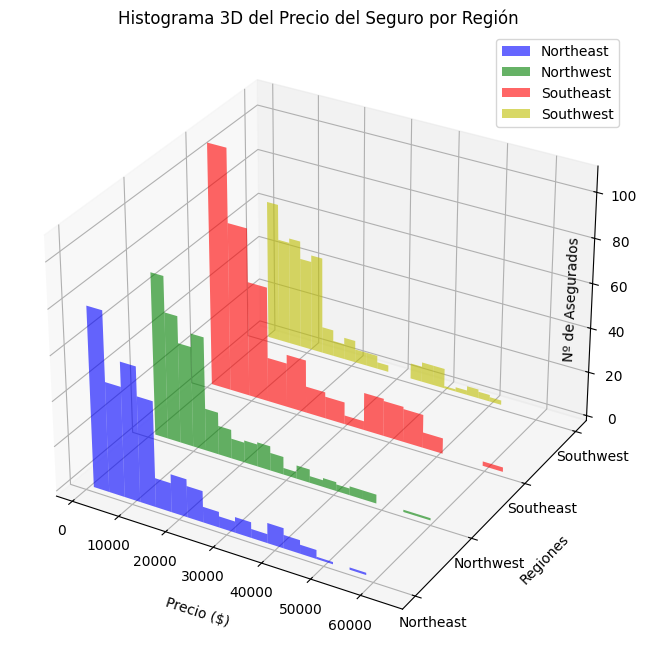

In [245]:
# Forma 1:

# Agrupamos por región y seleccionamos la columna 'charges'
northeast_charges = seguros[seguros['region'] == 'northeast']['charges']
northwest_charges = seguros[seguros['region'] == 'northwest']['charges']
southeast_charges = seguros[seguros['region'] == 'southeast']['charges']
southwest_charges = seguros[seguros['region'] == 'southwest']['charges']

# Crear la figura y el eje 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_size_inches(w=17, h=8)

# Para la región noreste
northeast_hist, northeast_bins = np.histogram(northeast_charges, bins='auto')
northeast_xs = (northeast_bins[:-1] + northeast_bins[1:]) / 2
ax.bar(northeast_xs, northeast_hist, zs=0, zdir='y', width=(northeast_bins[1] - northeast_bins[0]), color='b', alpha=0.6)

# Para la región noroeste
northwest_hist, northwest_bins = np.histogram(northwest_charges, bins='auto')
northwest_xs = (northwest_bins[:-1] + northwest_bins[1:]) / 2
ax.bar(northwest_xs, northwest_hist, zs=1, zdir='y', width=(northwest_bins[1] - northwest_bins[0]), color='g', alpha=0.6)

# Para la región sureste
southeast_hist, southeast_bins = np.histogram(southeast_charges, bins='auto')
southeast_xs = (southeast_bins[:-1] + southeast_bins[1:]) / 2
ax.bar(southeast_xs, southeast_hist, zs=2, zdir='y', width=(southeast_bins[1] - southeast_bins[0]), color='r', alpha=0.6)

# Para la región suroeste
southwest_hist, southwest_bins = np.histogram(southwest_charges, bins='auto')
southwest_xs = (southwest_bins[:-1] + southwest_bins[1:]) / 2
ax.bar(southwest_xs, southwest_hist, zs=3, zdir='y', width=(southwest_bins[1] - southwest_bins[0]), color='y', alpha=0.6)

# Etiquetas de los ejes
ax.set_xlabel('Precio ($)', labelpad=10)
ax.set_ylabel('Regiones', labelpad=10)
ax.set_zlabel('Nº de Asegurados', labelpad=-30)

# Configuramos las etiquetas en el eje Y
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(['Northeast', 'Northwest', 'Southeast', 'Southwest'])

plt.title('Histograma 3D del Precio del Seguro por Región')
plt.legend(['Northeast', 'Northwest', 'Southeast', 'Southwest'])
plt.show()


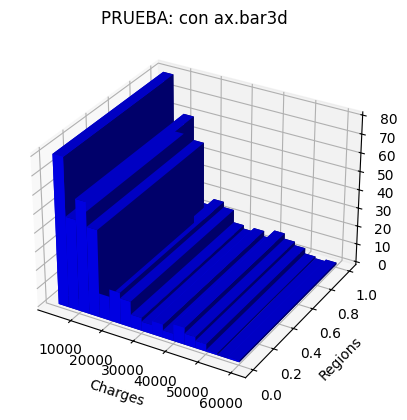

In [246]:
# Prueba con ax.bar3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define los datos de cada región (sólo un ejemplo para Northeast)
northeast_hist, northeast_bins = np.histogram(northeast_charges, bins='auto')
northeast_xs = (northeast_bins[:-1] + northeast_bins[1:]) / 2

# Configuración para la gráfica de barras en 3D
xpos = northeast_xs
ypos = np.zeros_like(northeast_xs)  # Cambia para cada región
zpos = np.zeros_like(northeast_xs)
dx = np.ones_like(northeast_xs) * (northeast_bins[1] - northeast_bins[0])  # Ancho de cada barra
dy = np.ones_like(northeast_xs)
dz = northeast_hist

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', label='Northeast')

# Configuración de etiquetas y visualización
ax.set_xlabel('Charges')
ax.set_ylabel('Regions')
ax.set_zlabel('Frequency')

plt.title('PRUEBA: con ax.bar3d')
plt.show()

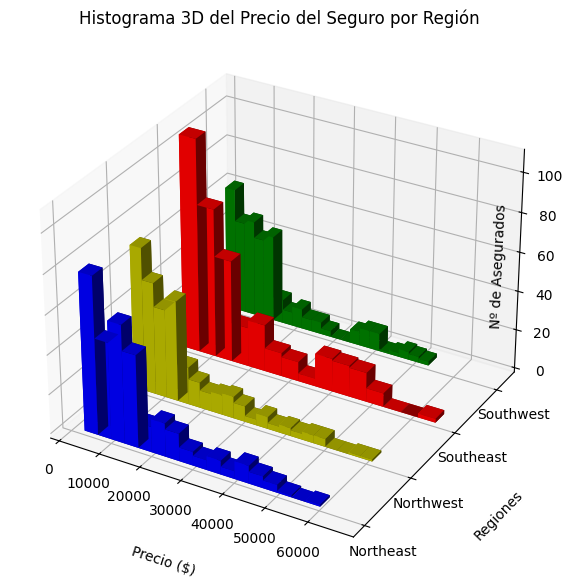

In [247]:
# Forma 2:
# https://matplotlib.org/stable/gallery/mplot3d/hist3d.html#sphx-glr-gallery-mplot3d-hist3d-py

# Lista de regiones y sus datos
region_charges = [northeast_charges, northwest_charges, southeast_charges, southwest_charges]
regions = ['Northeast', 'Northwest', 'Southeast', 'Southwest']
colors = ['b', 'y', 'r', 'g']

# Crear la figura y el eje 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_size_inches(w=7, h=7)

# Valores fijos de las posiciones en Y para cada región
y_positions = np.arange(len(regions))*1.5

# Iteramos sobre cada región para construir los histogramas en 3D
for i, (region_data, color) in enumerate(zip(region_charges, colors)):
    # Generamos el histograma para la región actual
    hist, bins = np.histogram(region_data, bins='auto')
    x_centers = (bins[:-1] + bins[1:]) / 2

    # Construct arrays for anchor positions and bar dimensions
    xpos = x_centers
    ypos = np.full_like(xpos, y_positions[i])
    zpos = 0

    # Widths of each bar
    dx = np.diff(bins)
    dy = np.full_like(xpos, 0.3)
    dz = hist

    # Bar chart in 3D for current region
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=color, zsort='average', label=regions[i])

# Etiquetas de los ejes
ax.set_xlabel('Precio ($)', labelpad=17)
ax.set_ylabel('Regiones', labelpad=20)
ax.set_zlabel('Nº de Asegurados', labelpad=-30)

# Configuramos las etiquetas en el eje Y
ax.set_yticks(y_positions)
ax.set_yticklabels(regions)

# Mostrar la leyenda y la gráfica
plt.title('Histograma 3D del Precio del Seguro por Región')
plt.show()


## Ejercicio 2
 En este ejercicio utilzamos los datos de actuaciones de bomberos.

In [248]:
bomberos23.head(2)

,AÑO,MES,DISTRITO,FUEGOS,DAÑOS EN CONSTRUCCION,SALVAMENTOS Y RESCATES,DAÑOS POR AGUA,INCIDENTES DIVERSOS,SALIDAS SIN INTERVENCION,SERVICIOS VARIOS,TOTAL
0,2023,diciembre,CENTRO,40,21,71,26,60,11,10,239
1,2023,diciembre,ARGANZUELA,13,7,34,13,16,2,2,87


In [249]:
bomberos24.head(2)

,AÑO,MES,DISTRITO,CODIGO DISTRITO,FUEGOS,DAÑOS EN CONSTRUCCION,SALVAMENTOS Y RESCATES,DAÑOS POR AGUA,INCIDENTES DIVERSOS,SALIDAS SIN INTERVENCION,SERVICIOS VARIOS
0,2024,septiembre,CENTRO,1,44,37,76,26,72,12,3
1,2024,septiembre,ARGANZUELA,2,21,4,30,13,36,3,3


In [250]:
# Comprobamos que no hay nulos en nuestro DF
bomberos23.isnull().sum()

,0
AÑO,0
MES,0
DISTRITO,0
FUEGOS,0
DAÑOS EN CONSTRUCCION,0
SALVAMENTOS Y RESCATES,0
DAÑOS POR AGUA,0
INCIDENTES DIVERSOS,0
SALIDAS SIN INTERVENCION,0
SERVICIOS VARIOS,0


In [251]:
# Comprobamos que no hay nulos en nuestro DF
bomberos24.isnull().sum()

,0
AÑO,0
MES,0
DISTRITO,0
CODIGO DISTRITO,0
FUEGOS,0
DAÑOS EN CONSTRUCCION,0
SALVAMENTOS Y RESCATES,0
DAÑOS POR AGUA,0
INCIDENTES DIVERSOS,0
SALIDAS SIN INTERVENCION,0


### a) Muestra un gráfico de barras con las salidas totales por distrito en todo el año 2023. En el eje x estará el distrito. (1 punto)





Introduce tu solución a partir de aquí ...

In [252]:
# Ver distritos repetidos y homogeneizarlos
bomberos23.DISTRITO.unique()

array(['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTIN',
       'TETUAN', 'CHAMBERI', 'FUENCARRAL', 'MONCLOA', 'LATINA',
       'CARABANCHEL', 'USERA', 'PUENTE VALLECAS', 'MORATALAZ',
       'CIUDAD LINEAL', 'HORTALEZA', 'VILLAVERDE', 'VILLA DE VALLECAS',
       'VICALVARO', 'SAN BLAS', 'BARAJAS', 'FUERA TERMINO MUNICIPAL',
       'FUERA DEL TÉRMINO MUNICIPAL'], dtype=object)

In [253]:
# Forma 1: deprecated(FutureWarning)
bomberos23.DISTRITO.replace({'FUERA DEL TÉRMINO MUNICIPAL': 'FUERA TERMINO MUNICIPAL'}, inplace = True)
label_distritos23 = (bomberos23.DISTRITO.unique())
label_distritos23.sort()
label_distritos23

<ipython-input-253-9c0d208ff11d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bomberos23.DISTRITO.replace({'FUERA DEL TÉRMINO MUNICIPAL': 'FUERA TERMINO MUNICIPAL'}, inplace = True)


array(['ARGANZUELA', 'BARAJAS', 'CARABANCHEL', 'CENTRO', 'CHAMARTIN',
       'CHAMBERI', 'CIUDAD LINEAL', 'FUENCARRAL',
       'FUERA TERMINO MUNICIPAL', 'HORTALEZA', 'LATINA', 'MONCLOA',
       'MORATALAZ', 'PUENTE VALLECAS', 'RETIRO', 'SALAMANCA', 'SAN BLAS',
       'TETUAN', 'USERA', 'VICALVARO', 'VILLA DE VALLECAS', 'VILLAVERDE'],
      dtype=object)

In [254]:
# Forma 2:
bomberos23['DISTRITO'] = bomberos23['DISTRITO'].replace({'FUERA DEL TÉRMINO MUNICIPAL': 'FUERA TERMINO MUNICIPAL'})
label_distritos23 = bomberos23.DISTRITO.unique()
label_distritos23.sort()
label_distritos23

array(['ARGANZUELA', 'BARAJAS', 'CARABANCHEL', 'CENTRO', 'CHAMARTIN',
       'CHAMBERI', 'CIUDAD LINEAL', 'FUENCARRAL',
       'FUERA TERMINO MUNICIPAL', 'HORTALEZA', 'LATINA', 'MONCLOA',
       'MORATALAZ', 'PUENTE VALLECAS', 'RETIRO', 'SALAMANCA', 'SAN BLAS',
       'TETUAN', 'USERA', 'VICALVARO', 'VILLA DE VALLECAS', 'VILLAVERDE'],
      dtype=object)

In [255]:
# agrupar por distrito
distrito_total_b23 = bomberos23.groupby('DISTRITO')['TOTAL'].sum()
distrito_total_b23

,TOTAL
DISTRITO,
ARGANZUELA,1214
BARAJAS,472
CARABANCHEL,1887
CENTRO,3134
CHAMARTIN,1338
CHAMBERI,1386
CIUDAD LINEAL,1519
FUENCARRAL,1629
FUERA TERMINO MUNICIPAL,61


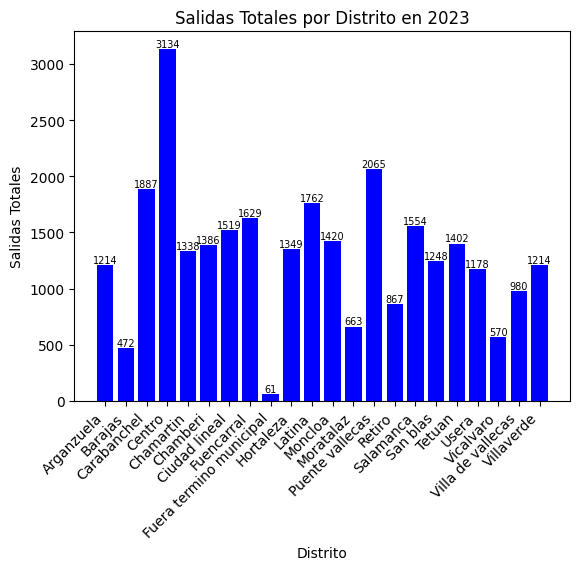

In [256]:
# Grafico de barras
fig, ax = plt.subplots()

capitalized_distritos = list(map(str.capitalize, distrito_total_b23.index))
capitalized_distritos = [x.capitalize() for x in distrito_total_b23.index]

b = ax.bar(x = capitalized_distritos, height = distrito_total_b23.values, label = capitalized_distritos, color = 'blue')

ax.bar_label(b, fontsize = 7)
# Rotar las etiquetas del eje X
ax.set_xticks(range(len(capitalized_distritos)))
ax.set_xticklabels(capitalized_distritos, rotation=45, ha='right')

ax.set_xlabel('Distrito')
ax.set_ylabel('Salidas Totales')
ax.set_title('Salidas Totales por Distrito en 2023')
# fontsize del numero de las barras

plt.show()


### b) Muestra un gráfico de tarta con las salidas, por tipo de salida, excepto las totales. Hay que utilizar los datos de todo Madrid para el año 2023.
(0.5 puntos)


Introduce tu solución a partir de aquí ...

In [257]:
# Hay que agrupar por la categoria: fuegos, inundaciones...
categoria_b23 = bomberos23.drop(columns = ['DISTRITO', 'AÑO', 'MES', 'TOTAL']).sum()
categoria_b23

,0
FUEGOS,5109
DAÑOS EN CONSTRUCCION,2140
SALVAMENTOS Y RESCATES,7388
DAÑOS POR AGUA,3185
INCIDENTES DIVERSOS,7554
SALIDAS SIN INTERVENCION,2412
SERVICIOS VARIOS,1124


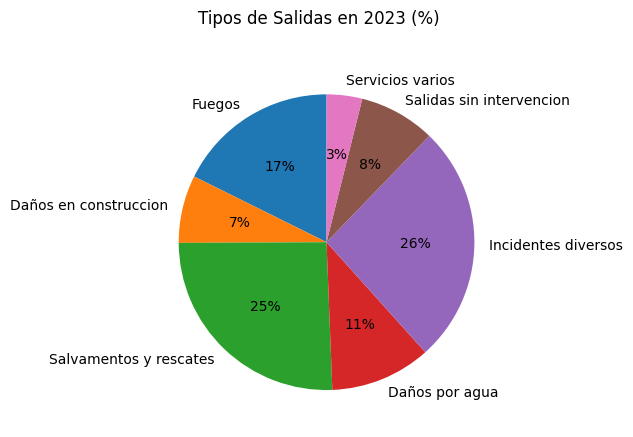

In [258]:
fig, ax = plt.subplots()

labels_danos = list(map(str.capitalize, categoria_b23.index))
labels_danos = [x.capitalize() for x in categoria_b23.index]

ax.pie(x = categoria_b23, labels = labels_danos, autopct='%d%%', startangle = 90)

# ax.legend(categoria_b23.index, loc = "lower left", fontsize = 7)

fig.suptitle("Tipos de Salidas en 2023 (%)")

plt.show()

### c) Muestra un gráfico de barras con las salidas totales mes a mes para 2023 para todo Madrid. En el eje x estarán los meses ordenados. Similar a:

![image.png](attachment:image.png)
(1 punto)




Introduce tu solución a partir de aquí ...

In [259]:
mes_a_mes = bomberos23.groupby('MES')['TOTAL'].sum()
mes_a_mes

,TOTAL
MES,
abril,2124
agosto,2619
diciembre,2393
enero,2185
febrero,1652
julio,2651
junio,2433
marzo,1984
mayo,2498


In [260]:
# Ordenamos los meses:
# Definimos el orden correcto de los meses
orden_meses = ["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]

# Convertimos el índice 'MES' a tipo categórico con el orden especificado
mes_a_mes.index = pd.CategoricalIndex(mes_a_mes.index, categories=orden_meses, ordered=True)

# Reordenamos el DataFrame por el índice categórico
mes_a_mes = mes_a_mes.sort_index()

mes_a_mes

,TOTAL
MES,
enero,2185
febrero,1652
marzo,1984
abril,2124
mayo,2498
junio,2433
julio,2651
agosto,2619
septiembre,2751


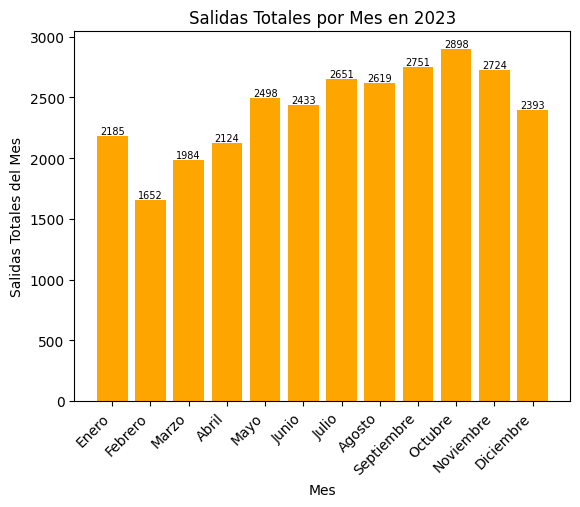

In [261]:
# Grafico de barras
fig, ax = plt.subplots()

label_meses = list(map(str.capitalize, mes_a_mes.index))
label_meses = [x.capitalize() for x in mes_a_mes.index]

b = ax.bar(x = label_meses, height = mes_a_mes.values, label = label_meses, color = 'orange')

ax.bar_label(b, fontsize = 7)

# Rotar las etiquetas del eje X
ax.set_xticks(range(len(label_meses)))
ax.set_xticklabels(label_meses, rotation=45, ha='right')

ax.set_xlabel('Mes')
ax.set_ylabel('Salidas Totales del Mes')
ax.set_title('Salidas Totales por Mes en 2023')
# fontsize del numero de las barras

plt.show()

### d) Muestra un grafíco de línea con las salidas totales mes a mes con los datos de tres distritos para 2023.

![image.png](attachment:image.png)
(1 punto)

Introduce tu solución a partir de aquí ...

In [262]:
mes_a_mes23 = bomberos23.groupby(['MES', 'DISTRITO'])['TOTAL'].sum().reset_index()
mes_a_mes23

,MES,DISTRITO,TOTAL
0,abril,ARGANZUELA,89
1,abril,BARAJAS,31
2,abril,CARABANCHEL,128
3,abril,CENTRO,223
4,abril,CHAMARTIN,98
...,...,...,...
259,septiembre,TETUAN,149
260,septiembre,USERA,107
261,septiembre,VICALVARO,61
262,septiembre,VILLA DE VALLECAS,90


In [263]:
# Ordenamos por meses:
# Definimos el orden correcto de los meses
orden_meses = ["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]

# Convertimos el índice 'MES' a tipo categórico con el orden especificado
mes_a_mes23['MES'] = pd.CategoricalIndex(mes_a_mes23['MES'], categories=orden_meses, ordered=True)

# Reordenamos el DataFrame por el índice categórico
mes_a_mes23 = mes_a_mes23.sort_values('MES').reset_index(drop=True)

mes_a_mes23

,MES,DISTRITO,TOTAL
0,enero,MORATALAZ,46
1,enero,VICALVARO,41
2,enero,USERA,93
3,enero,TETUAN,105
4,enero,SAN BLAS,79
...,...,...,...
259,diciembre,CHAMARTIN,118
260,diciembre,CENTRO,239
261,diciembre,ARGANZUELA,87
262,diciembre,MONCLOA,105


In [264]:
# Agrupamos para el distrito centro
mes_a_mes_centro23 = mes_a_mes23[mes_a_mes23.DISTRITO == 'CENTRO']
mes_a_mes_centro23 = mes_a_mes_centro23.groupby('MES', observed=False)['TOTAL'].sum().reset_index()
mes_a_mes_centro23

,MES,TOTAL
0,enero,245
1,febrero,169
2,marzo,288
3,abril,223
4,mayo,279
5,junio,258
6,julio,287
7,agosto,247
8,septiembre,274
9,octubre,331


In [265]:
# Comprobacion
mes_a_mes_centro23.TOTAL.sum()

3134

In [266]:
# Agrupamos para el distrito retiro y vallecas
mes_a_mes_retiro23 = mes_a_mes23[mes_a_mes23.DISTRITO == 'RETIRO']
mes_a_mes_retiro23 = mes_a_mes_retiro23.groupby('MES', observed=False)['TOTAL'].sum().reset_index()

mes_a_mes_vallecas23 = mes_a_mes23[mes_a_mes23.DISTRITO == 'PUENTE VALLECAS']
mes_a_mes_vallecas23 = mes_a_mes_vallecas23.groupby('MES', observed=False)['TOTAL'].sum().reset_index()

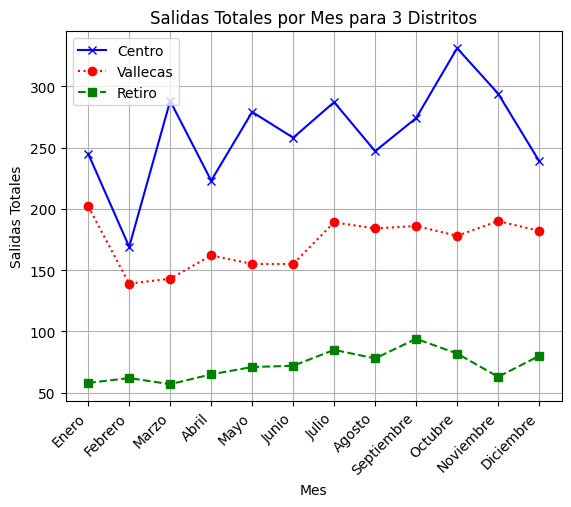

In [267]:
y_centro = mes_a_mes_centro23['TOTAL'].values
y_retiro = mes_a_mes_retiro23['TOTAL'].values
y_vallecas = mes_a_mes_vallecas23['TOTAL'].values

x_centro = list(map(str.capitalize, mes_a_mes_centro23.MES))
x_centro = [x.capitalize() for x in mes_a_mes_centro23.MES]

fig, ax = plt.subplots()

plt.plot(x_centro, y_centro, "x-b")
plt.plot(x_centro, y_vallecas, "o:r")
plt.plot(x_centro, y_retiro, "s--g")

plt.legend(["Centro", "Vallecas", "Retiro"])
plt.title("Salidas Totales por Mes para 3 Distritos")
plt.xlabel("Mes")
plt.ylabel("Salidas Totales")

# Rotar las etiquetas del eje X
ax.set_xticks(range(len(x_centro)))
ax.set_xticklabels(x_centro, rotation=45, ha='right')

plt.grid(True)

plt.show()

### e) Muestra un grafico como el anterior, pero añadiendo los meses disponibles para 2024. En este caso el eje x irá desde enero de 2023 hasta septiembre de 2024. Se valorará que la solución acepte ficheros de 2024 con más meses, según se vayan publicando.
(0.5 puntos)

Introduce tu solución a partir de aquí ...

In [268]:
bomberos24.head(2)

,AÑO,MES,DISTRITO,CODIGO DISTRITO,FUEGOS,DAÑOS EN CONSTRUCCION,SALVAMENTOS Y RESCATES,DAÑOS POR AGUA,INCIDENTES DIVERSOS,SALIDAS SIN INTERVENCION,SERVICIOS VARIOS
0,2024,septiembre,CENTRO,1,44,37,76,26,72,12,3
1,2024,septiembre,ARGANZUELA,2,21,4,30,13,36,3,3


In [269]:
bomberos24['TOTAL'] = bomberos24[['FUEGOS',
                                  'DAÑOS EN CONSTRUCCION',
                                  'SALVAMENTOS Y RESCATES',
                                  'DAÑOS POR AGUA',
                                  'INCIDENTES DIVERSOS',
                                  'SALIDAS SIN INTERVENCION',
                                  'SERVICIOS VARIOS']].sum(axis=1)

bomberos24.head(2)

,AÑO,MES,DISTRITO,CODIGO DISTRITO,FUEGOS,DAÑOS EN CONSTRUCCION,SALVAMENTOS Y RESCATES,DAÑOS POR AGUA,INCIDENTES DIVERSOS,SALIDAS SIN INTERVENCION,SERVICIOS VARIOS,TOTAL
0,2024,septiembre,CENTRO,1,44,37,76,26,72,12,3,270
1,2024,septiembre,ARGANZUELA,2,21,4,30,13,36,3,3,110


In [270]:
mes_a_mes24 = bomberos24.groupby(['MES', 'DISTRITO'])['TOTAL'].sum().reset_index()
mes_a_mes24

,MES,DISTRITO,TOTAL
0,abril,ARGANZUELA,88
1,abril,BARAJAS,38
2,abril,CARABANCHEL,140
3,abril,CENTRO,284
4,abril,CHAMARTIN,96
...,...,...,...
193,septiembre,TETUAN,129
194,septiembre,USERA,106
195,septiembre,VICALVARO,56
196,septiembre,VILLA DE VALLECAS,75


In [271]:
# Comprobamos si los distritos de Centro, Puente Vallecas y Retiro estan bien insertados y no "por partes":
bomberos24.DISTRITO.unique()

array(['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTIN',
       'TETUAN', 'CHAMBERI', 'FUENCARRAL-EL PARDO', 'MONCLOA-ARAVACA',
       'LATINA', 'CARABANCHEL', 'USERA', 'PUENTE VALLECAS', 'MORATALAZ',
       'CIUDAD LINEAL', 'HORTALEZA', 'VILLAVERDE', 'VILLA DE VALLECAS',
       'VICALVARO', 'SAN BLAS-CANILLEJAS', 'BARAJAS',
       'FUERA TERRITORIO MUNICIPAL', 'FUERA TERMINO MUNICIPAL',
       'FUERA DEL TÉRMINO MUNICIPAL'], dtype=object)

In [272]:
# Comprobamos los meses que hay
bomberos24.MES.unique()

array(['septiembre', 'agosto', 'julio', 'junio', 'mayo', 'abril', 'marzo',
       'febrero', 'enero'], dtype=object)

In [273]:
# Ordenamos por meses:
# Definimos el orden correcto de los meses
orden_meses = ["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]

# Convertimos el índice 'MES' a tipo categórico con el orden especificado
mes_a_mes24['MES'] = pd.CategoricalIndex(mes_a_mes24['MES'], categories=orden_meses, ordered=True)

# Reordenamos el DataFrame por el índice categórico
mes_a_mes24 = mes_a_mes24.sort_values('MES').reset_index(drop=True)

mes_a_mes24

,MES,DISTRITO,TOTAL
0,enero,VILLAVERDE,86
1,enero,ARGANZUELA,82
2,enero,BARAJAS,27
3,enero,CARABANCHEL,149
4,enero,CENTRO,230
...,...,...,...
193,septiembre,BARAJAS,29
194,septiembre,ARGANZUELA,110
195,septiembre,VILLA DE VALLECAS,75
196,septiembre,HORTALEZA,115


In [274]:
# Concatenar los DFs
mes_a_mes_centro24 = mes_a_mes24[mes_a_mes24.DISTRITO == 'CENTRO']
mes_a_mes_centro24 = mes_a_mes_centro24.groupby('MES', observed=False)['TOTAL'].sum().reset_index()

# Añadir un sufijo (si no grafica un mes encima del otro, enero de 2023 encima de enero de 2024)
mes_a_mes_centro23['MES'] = mes_a_mes_centro23['MES'].astype(str) + ' 23'
mes_a_mes_centro24['MES'] = mes_a_mes_centro24['MES'].astype(str) + ' 24'

mes_a_mes_centro_23_24 = pd.concat([mes_a_mes_centro23, mes_a_mes_centro24], ignore_index=True)

mes_a_mes_centro_23_24

,MES,TOTAL
0,enero 23,245
1,febrero 23,169
2,marzo 23,288
3,abril 23,223
4,mayo 23,279
5,junio 23,258
6,julio 23,287
7,agosto 23,247
8,septiembre 23,274
9,octubre 23,331


In [275]:
# Concatenar el DF de Retiro
mes_a_mes_retiro24 = mes_a_mes24[mes_a_mes24.DISTRITO == 'RETIRO']
mes_a_mes_retiro24 = mes_a_mes_retiro24.groupby('MES', observed=False)['TOTAL'].sum().reset_index()

# Añadir un sufijo (si no grafica un mes encima del otro, enero de 2023 encima de enero de 2024)
mes_a_mes_retiro23['MES'] = mes_a_mes_retiro23['MES'].astype(str) + ' 23'
mes_a_mes_retiro24['MES'] = mes_a_mes_retiro24['MES'].astype(str) + ' 24'

mes_a_mes_retiro_23_24 = pd.concat([mes_a_mes_retiro23, mes_a_mes_retiro24], ignore_index=True)

In [276]:
# Concatenar el DF de Vallecas
mes_a_mes_vallecas24 = mes_a_mes24[mes_a_mes24.DISTRITO == 'PUENTE VALLECAS']
mes_a_mes_vallecas24 = mes_a_mes_vallecas24.groupby('MES', observed=False)['TOTAL'].sum().reset_index()

# Añadir un sufijo (si no grafica un mes encima del otro, enero de 2023 encima de enero de 2024)
mes_a_mes_vallecas23['MES'] = mes_a_mes_vallecas23['MES'].astype(str) + ' 23'
mes_a_mes_vallecas24['MES'] = mes_a_mes_vallecas24['MES'].astype(str) + ' 24'

mes_a_mes_vallecas_23_24 = pd.concat([mes_a_mes_vallecas23, mes_a_mes_vallecas24], ignore_index=True)

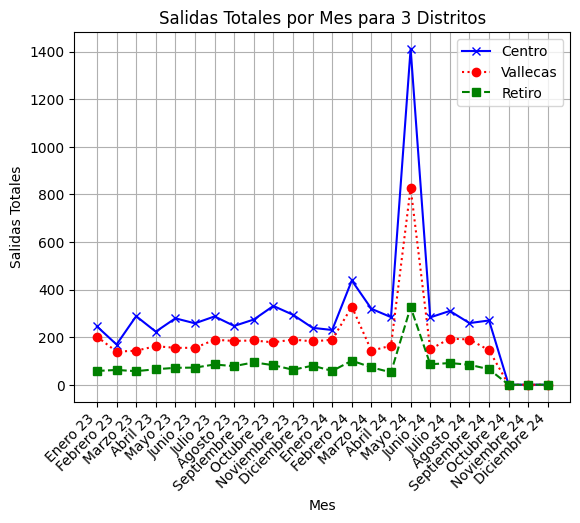

In [277]:
y_centro = mes_a_mes_centro_23_24['TOTAL'].values
y_retiro = mes_a_mes_retiro_23_24['TOTAL'].values
y_vallecas = mes_a_mes_vallecas_23_24['TOTAL'].values

x_centro = list(map(str.capitalize, mes_a_mes_centro_23_24.MES))
x_centro = [x.capitalize() for x in mes_a_mes_centro_23_24.MES]

fig, ax = plt.subplots()

plt.plot(x_centro, y_centro, "x-b")
plt.plot(x_centro, y_vallecas, "o:r")
plt.plot(x_centro, y_retiro, "s--g")

plt.legend(["Centro", "Vallecas", "Retiro"])
plt.title("Salidas Totales por Mes para 3 Distritos")
plt.xlabel("Mes")
plt.ylabel("Salidas Totales")

# Rotar las etiquetas del eje X
ax.set_xticks(range(len(x_centro)))
ax.set_xticklabels(x_centro, rotation=45, ha='right')

plt.grid(True)

plt.show()